Best Learning Rate: 0.01
Best Regularization (λ): 1e-15
Minimum Cost: 0.147080
Maximum R² Score: 0.949561
Training R² Score: 0.948472
Testing  R² Score: 0.949561


/Users/ak/Desktop/Sem 5/ML/UML501/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


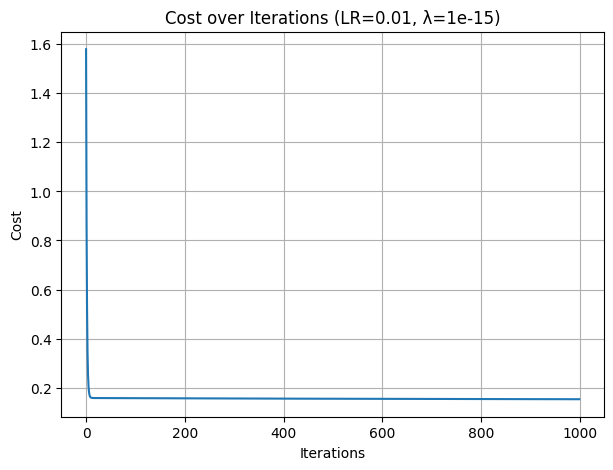


Sample Predictions (Actual vs Predicted):
Actual: -0.023   Predicted: 1.306
Actual: 2.490   Predicted: 2.378
Actual: -4.168   Predicted: -4.507
Actual: -0.447   Predicted: -1.181
Actual: -2.865   Predicted: -2.706
Actual: 2.005   Predicted: 2.461
Actual: -2.105   Predicted: -2.460
Actual: -2.581   Predicted: -2.489
Actual: 1.769   Predicted: 1.549
Actual: -2.096   Predicted: -1.673


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
n_samples = 1000
x1 = np.random.randn(n_samples)
x2 = x1 + np.random.normal(0, 0.1, n_samples)
x3 = x1 + x2 + np.random.normal(0, 0.1, n_samples)
x4 = 0.5 * x1 + 0.3 * x2 + np.random.normal(0, 0.1, n_samples)
x5 = x2 + x3 + np.random.normal(0, 0.1, n_samples)
x6 = 2 * x1 - x3 + np.random.normal(0, 0.1, n_samples)
x7 = x4 + x5 + x6 + np.random.normal(0, 0.1, n_samples)
X = np.column_stack([x1, x2, x3, x4, x5, x6, x7])
y = 3*x1 + 2*x2 - 1.5*x3 + 0.5*x4 + np.random.normal(0, 0.5, n_samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def ridge_cost(X, y, weights, lam):
    n = len(y)
    y_pred = X.dot(weights)
    cost = (1/(2*n)) * np.sum((y_pred - y)**2) + (lam/(2*n)) * np.sum(weights[1:]**2)
    return cost

def ridge_gradient_descent(X, y, lr, lam, epochs=1000):
    n, m = X.shape
    weights = np.zeros(m)
    cost_history = []
    for _ in range(epochs):
        y_pred = X.dot(weights)
        gradient = (1/n) * X.T.dot(y_pred - y) + (lam/n) * np.r_[0, weights[1:]]
        weights -= lr * gradient
        cost_history.append(ridge_cost(X, y, weights, lam))
        if np.isnan(cost_history[-1]) or np.isinf(cost_history[-1]):
            return None, None  # Diverged
    return weights, cost_history

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lambdas = [1e-15, 1e-10, 1e-5, 1e-3, 0, 1, 10, 20]
best_r2 = -np.inf
best_cost = np.inf
best_params = None
best_weights = None
best_history = None

for lr in learning_rates:
    for lam in lambdas:
        weights, cost_history = ridge_gradient_descent(X_train_b, y_train, lr, lam, epochs=1000)
        if weights is None:  
            continue
        y_pred = X_test_b.dot(weights)
        if np.any(np.isnan(y_pred)) or np.any(np.isinf(y_pred)):
            continue
        cost = ridge_cost(X_test_b, y_test, weights, lam)
        r2 = r2_score(y_test, y_pred)
        if (r2 > best_r2) or (r2 == best_r2 and cost < best_cost):
            best_r2 = r2
            best_cost = cost
            best_params = (lr, lam)
            best_weights = weights
            best_history = cost_history
print(f"Best Learning Rate: {best_params[0]}")
print(f"Best Regularization (λ): {best_params[1]}")
print(f"Minimum Cost: {best_cost:.6f}")
print(f"Maximum R² Score: {best_r2:.6f}")

y_pred_train = X_train_b.dot(best_weights)
y_pred_test = X_test_b.dot(best_weights)
print(f"Training R² Score: {r2_score(y_train, y_pred_train):.6f}")
print(f"Testing  R² Score: {r2_score(y_test, y_pred_test):.6f}")
plt.figure(figsize=(7,5))
plt.plot(best_history)
plt.title(f"Cost over Iterations (LR={best_params[0]}, λ={best_params[1]})")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()
print("\nSample Predictions (Actual vs Predicted):")
for actual, pred in zip(y_test[:10], X_test_b.dot(best_weights)[:10]):
    print(f"Actual: {actual:.3f}   Predicted: {pred:.3f}")